In [68]:
# set up libraries
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# read in data
url = 'https://raw.githubusercontent.com/cs109/2014_data/master/diamonds.csv'
diamonds = pd.read_csv(url, index_col=0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [70]:
diamonds.columns.to_series().groupby(diamonds.dtypes).groups

{dtype('int64'): ['price'],
 dtype('float64'): ['carat', 'depth', 'table', 'x', 'y', 'z'],
 dtype('O'): ['cut', 'color', 'clarity']}

In [71]:
# statistic summary for quantitative variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
# frequency table for qualitative variables
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

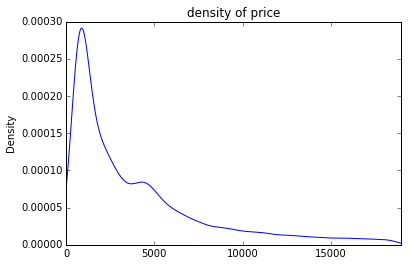

In [17]:
# get a sense of the distribution of price
diamonds['price'].plot(kind = 'density')
plt.xlim(0, 19000)
plt.title('density of price')

(0, 20000.0)

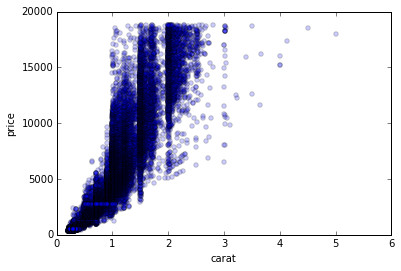

In [30]:
# scatter plot of price and carat
diamonds.plot(kind = 'scatter', x = 'carat', y = 'price', alpha = 0.2)
plt.xlim(0)
plt.ylim(0)

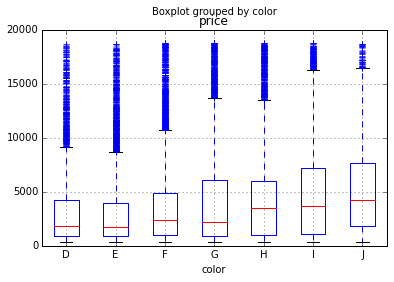

In [31]:
# boxplot of price by cut
diamonds.boxplot('price', by = 'color')

In [56]:
# import seaborn for graphic mapping
import seaborn as sns

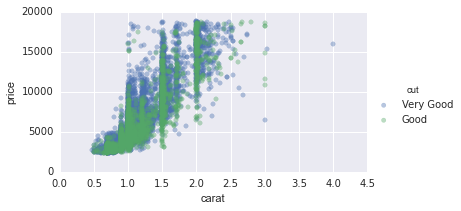

In [61]:
fg = sns.FacetGrid(data = diamonds[(diamonds.price >= np.median(diamonds.price)) & 
                                 (diamonds.cut.isin(['Very Good', 'Good']))], hue = 'cut', aspect = 1.8)
fg.map(plt.scatter, 'carat', 'price', alpha = 0.4)
fg.add_legend()

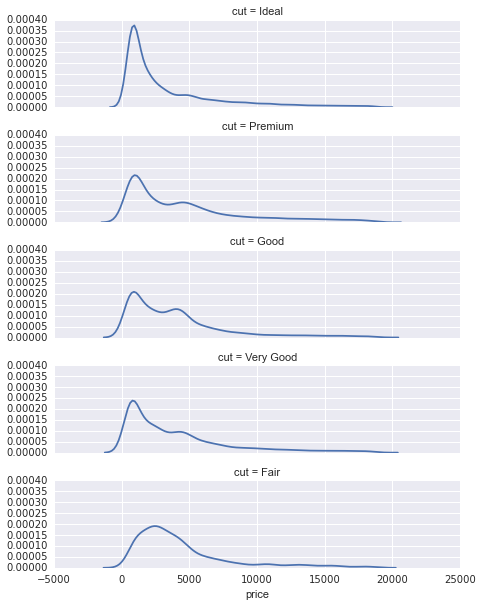

In [67]:
# Density plot by cut
fg_den = sns.FacetGrid(data = diamonds, row = 'cut', size = 1.7, aspect = 4)
fg_den.map(sns.distplot, 'price', hist = False)